In [10]:
from deap import base
from deap import creator
from deap import tools

In [11]:
import warnings
warnings.filterwarnings("ignore")
import random
import matplotlib.pyplot as plt
import numpy as np

# константы задачи
ONE_MAX_LENGTH = 100    # длина подлежащей оптимизации битовой строки

# константы генетического алгоритма
POPULATION_SIZE = 100   # количество индивидуумов в популяции
P_CROSSOVER = 0.4       # вероятность скрещивания
P_MUTATION = 0.3        # вероятность мутации индивидуума
MAX_GENERATIONS = 60   # максимальное количество поколений

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

#приспособленность индивидума
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)


In [12]:
def oneMaxFitness(individual):
    return sum(individual), # кортеж

toolbox = base.Toolbox()

toolbox.register("zeroOrOne", random.randint, 0, 1)
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, ONE_MAX_LENGTH)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

population = toolbox.populationCreator(n=POPULATION_SIZE)

toolbox.register("evaluate", oneMaxFitness)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/ONE_MAX_LENGTH)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", np.max)
stats.register("avg", np.mean)

gen	nevals	max	avg  
0  	100   	61 	50.16
1  	64    	64 	53.82
2  	53    	68 	56.69
3  	64    	71 	59.82
4  	74    	71 	62.76
5  	44    	73 	65.94
6  	59    	73 	68.34
7  	64    	74 	70.11
8  	55    	74 	71.52
9  	70    	75 	72.41
10 	53    	76 	73.36
11 	63    	77 	74   
12 	50    	78 	74.72
13 	60    	79 	75.36
14 	50    	80 	76.53
15 	45    	81 	77.67
16 	50    	81 	78.37
17 	49    	82 	79.37
18 	47    	84 	80.1 
19 	63    	85 	80.58
20 	53    	85 	81.4 
21 	58    	85 	82.33
22 	57    	86 	83.37
23 	52    	86 	83.81
24 	59    	87 	84.33
25 	58    	87 	85.1 
26 	63    	88 	85.56
27 	51    	88 	86.23
28 	58    	88 	86.88
29 	59    	89 	87.25
30 	55    	90 	87.77
31 	54    	90 	88.42
32 	60    	91 	88.9 
33 	66    	91 	89.24
34 	59    	91 	89.74
35 	59    	92 	90.18
36 	53    	93 	90.66
37 	43    	94 	91.45
38 	53    	94 	91.94
39 	55    	95 	92.59
40 	57    	96 	93.16
41 	47    	96 	93.79
42 	55    	97 	94.25
43 	57    	97 	95.07
44 	73    	97 	95.51
45 	59    	97 	96.04
46 	61    	97

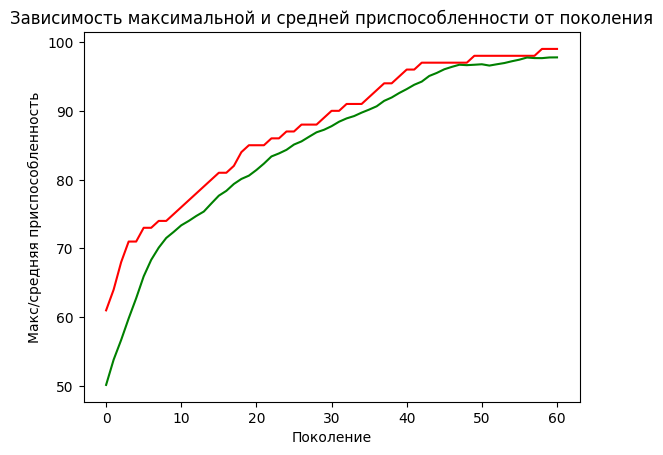

In [13]:
from deap import base, algorithms
from deap import creator
from deap import tools
population, logbook = algorithms.eaSimple(population, toolbox,
                                        cxpb=P_CROSSOVER,
                                        mutpb=P_MUTATION,
                                        ngen=MAX_GENERATIONS,
                                        stats=stats,
                                        verbose=True)

maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Поколение')
plt.ylabel('Макс/средняя приспособленность')
plt.title('Зависимость максимальной и средней приспособленности от поколения')
plt.show()


